In [1]:
from datasets import synthetic
from methods.ZSB import ZSBSensitivityAnalysis
from bootstrap import BootstrapSensitivityAnalysis
import numpy as np

In [2]:
n_obs = 5000
n_rct = 5000
gamma_obs = 4.0
data_obs = synthetic.Synthetic(n_obs, gamma_obs, "pi")
data_rct = synthetic.Synthetic(n_rct, 1.0, "pi")
e_x = lambda x: (1+np.exp(- (x*0.75+0.5)))** -1

In [3]:
print(f"Unconfounded Y(1): {(data_obs.t * data_obs.y/data_obs.pi).mean()/(data_obs.t /data_obs.pi).mean()}")
print(f"Confounded Y(1): {(data_obs.t * data_obs.y/e_x(data_obs.x)).mean()/(data_obs.t /e_x(data_obs.x)).mean()}")

Unconfounded Y(1): 1.0162928104400635
Confounded Y(1): 0.3380780816078186


In [4]:
sa = ZSBSensitivityAnalysis(data_obs.x, data_obs.t, data_obs.y, e_x, 3.5)
print(sa.solve_bounds())

(-0.7824438541211564, 1.106835916117237)


In [5]:
bootstrap_sa = BootstrapSensitivityAnalysis(sa)
bounds_dist = bootstrap_sa.bootstrap(num_samples=1000, results_path = "/Users/javierabad/Documents/GitLab/robust-cate/results/synthetic")

Elapsed time for 1000 bootstrap samples: 47.49 seconds


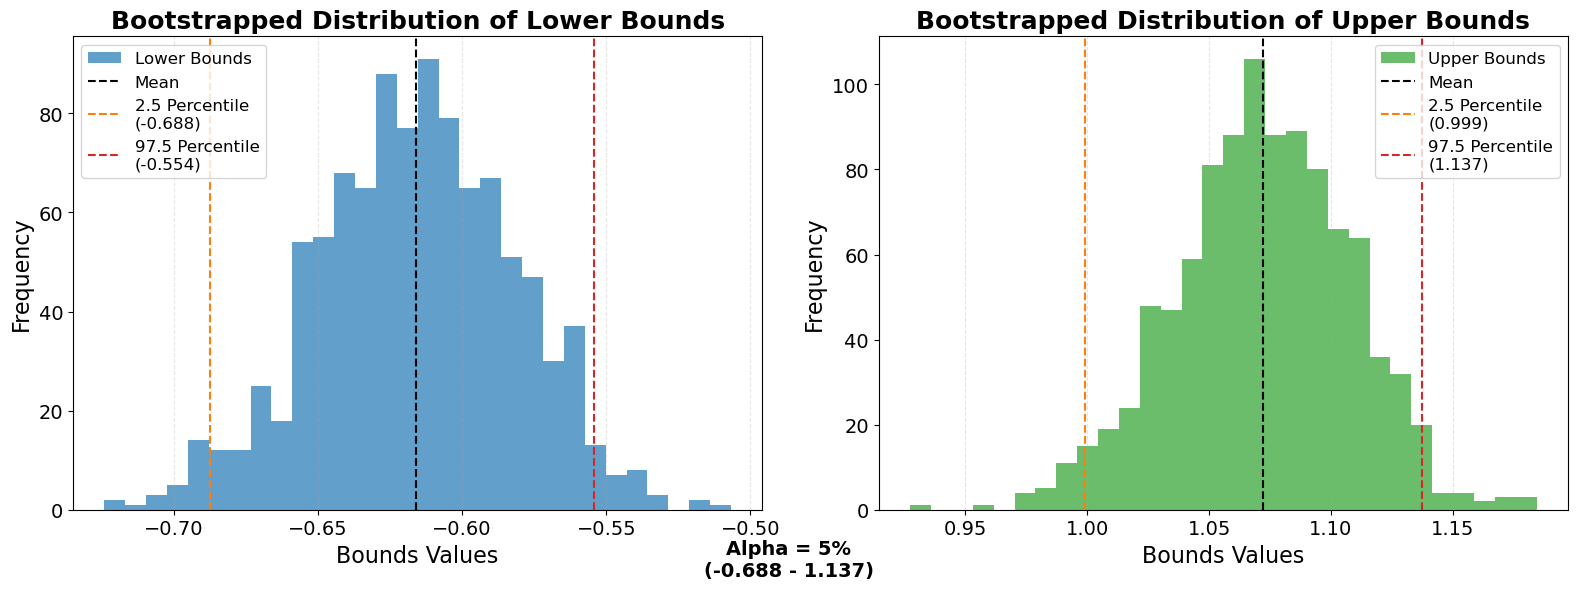

In [6]:
bootstrap_sa.plot_distribution(alpha=5)